In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from osgeo import gdal
import rasterio
from rasterio.plot import show_hist
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import box
from fiona.crs import from_epsg

In [2]:
folder='imagery/S2A_MSIL2A_20190822T152641_N0213_R025_T18NVK_20190822T210428.SAFE/GRANULE/L2A_T18NVK_A021758_20190822T152641/IMG_DATA'

In [3]:
os.listdir(folder)

['R60m', 'R20m', 'R10m']

In [4]:
for sub_folder in os.listdir(folder):
    print (f'{sub_folder} :', )
    for file in os.listdir(os.path.join(folder, sub_folder)):
        print (file)

R60m :
T18NVK_20190822T152641_B12_60m.jp2
T18NVK_20190822T152641_B02_60m.jp2
T18NVK_20190822T152641_B03_60m.jp2
T18NVK_20190822T152641_B11_60m.jp2
T18NVK_20190822T152641_B01_60m.jp2
T18NVK_20190822T152641_SCL_60m.jp2
T18NVK_20190822T152641_B09_60m.jp2
T18NVK_20190822T152641_B05_60m.jp2
T18NVK_20190822T152641_AOT_60m.jp2
T18NVK_20190822T152641_B04_60m.jp2
T18NVK_20190822T152641_TCI_60m.jp2
T18NVK_20190822T152641_WVP_60m.jp2
T18NVK_20190822T152641_B06_60m.jp2
T18NVK_20190822T152641_B8A_60m.jp2
T18NVK_20190822T152641_B07_60m.jp2
R20m :
T18NVK_20190822T152641_B03_20m.jp2
T18NVK_20190822T152641_B12_20m.jp2
T18NVK_20190822T152641_B02_20m.jp2
T18NVK_20190822T152641_SCL_20m.jp2
T18NVK_20190822T152641_B11_20m.jp2
T18NVK_20190822T152641_B04_20m.jp2
T18NVK_20190822T152641_AOT_20m.jp2
T18NVK_20190822T152641_B05_20m.jp2
.ipynb_checkpoints
T18NVK_20190822T152641_B8A_20m.jp2
T18NVK_20190822T152641_B07_20m.jp2
T18NVK_20190822T152641_B06_20m.jp2
T18NVK_20190822T152641_WVP_20m.jp2
T18NVK_20190822T152641

Band designations are found here:

https://www.usgs.gov/centers/eros/science/usgs-eros-archive-sentinel-2?qt-science_center_objects=0#qt-science_center_objects

In [5]:
band4='T18NVK_20190822T152641_B04_10m.jp2'
band2='T18NVK_20190822T152641_B02_10m.jp2'
band3='T18NVK_20190822T152641_B03_10m.jp2'

In [6]:
resolution='R10m'

In [19]:
bands=[]
for band in [band2, band3, band4]:
    src=rasterio.open(os.path.join(folder, resolution, band))
    data=src.read(1)
    bands.append(data)

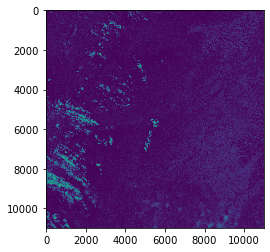

In [28]:
plt.imshow(data)

In [29]:
data.max()

17008

In [30]:
data.min()

0

In [20]:
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return (array - array_min) / (array_max - array_min)

In [21]:
normalized_list=[]

for band in bands:
    normalized_list.append(normalize(band))   

In [22]:
true_color=np.dstack(normalized_list)

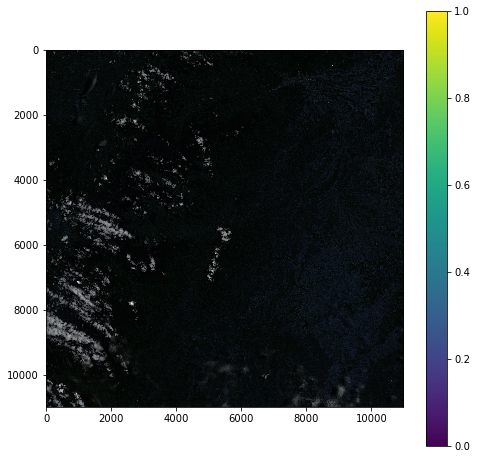

In [24]:
plt.figure(figsize=(8,8))
plt.imshow(true_color)
plt.colorbar()